In [1]:
import FinanceDataReader as fdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = fdr.DataReader('005930', '2021-01-01', '2023-07-01')

df.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2023-06-26,71700,72500,71500,72400,10541901,0.011173
2023-06-27,72500,72600,72000,72600,9442997,0.002762
2023-06-28,72600,72700,72000,72700,8783093,0.001377
2023-06-29,73100,73400,72400,72400,12229967,-0.004127
2023-06-30,72500,72700,71700,72200,11694765,-0.002762


In [3]:
df.shape

(617, 6)

In [4]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)

    return numerator / (denominator + 1e-7)

In [5]:
dfx = df[['Open', 'High', 'Low', 'Close', 'Volume']]
dfx = MinMaxScaler(dfx)

dfy = dfx[['Close']]
dfx = dfx[['Open', 'High', 'Low', 'Volume']]

dfx

,Open,High,Low,Volume
Date,,,,
2021-01-04,0.755263,0.712963,0.753316,0.389023
2021-01-05,0.771053,0.701389,0.790451,0.349756
2021-01-06,0.815789,0.715278,0.803714,0.429641
2021-01-07,0.802632,0.708333,0.819629,0.317924
2021-01-08,0.815789,0.842593,0.827586,0.629838
...,...,...,...,...
2023-06-26,0.510526,0.437500,0.522546,0.056471
2023-06-27,0.531579,0.439815,0.535809,0.043473
2023-06-28,0.534211,0.442130,0.535809,0.035667


In [6]:
dfx.describe()

,Open,High,Low,Volume
count,617.000000,617.000000,617.000000,617.000000
mean,0.472648,0.398268,0.473541,0.121281
std,0.242916,0.215477,0.242252,0.087229
min,0.000000,0.000000,0.000000,0.000000
25%,0.242105,0.194444,0.244032,0.070604
50%,0.471053,0.395833,0.480106,0.098443
75%,0.702632,0.597222,0.708223,0.146139
max,1.000000,1.000000,1.000000,1.000000


In [7]:
dfy.head()

,Close
Date,
2021-01-04,0.791667
2021-01-05,0.815104
2021-01-06,0.770833
2021-01-07,0.789062
2021-01-08,0.942708


In [8]:
time_step = 10
step = 1

def create_dataset(X, y, time_step, step):
    Xs, ys = [], []

    for i in range(0, len(X) - time_step, step):
        v = X.iloc[i : (i + time_step)].values
        labels = y.iloc[i + time_step]

        Xs.append(v)
        ys.append(labels)

    return np.array(Xs), np.array(ys)


In [9]:
X, y = create_dataset(dfx, dfy, time_step, step)

X.shape

(607, 10, 4)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=False)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((406, 10, 4), (201, 10, 4), (406, 1), (201, 1))

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout

In [12]:
model = Sequential([
    SimpleRNN(20, activation='relu', input_shape=(X.shape[1:]), return_sequences=True),
    Dropout(0.5),
    SimpleRNN(20, activation='relu'),
    Dropout(0.3),
    Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10, 20)            500       
                                                                 
 dropout (Dropout)           (None, 10, 20)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 20)                820       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 1,341
Trainable params: 1,341
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='mse', optimizer='adam')

In [14]:
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.33, shuffle=False)

Epoch 1/500
9/9 [==============================] - 1s 30ms/step - loss: 0.4183 - val_loss: 0.0532
Epoch 2/500
9/9 [==============================] - 0s 6ms/step - loss: 0.3184 - val_loss: 0.0397
Epoch 3/500
9/9 [==============================] - 0s 5ms/step - loss: 0.2169 - val_loss: 0.0316
Epoch 4/500
9/9 [==============================] - 0s 6ms/step - loss: 0.2145 - val_loss: 0.0291
Epoch 5/500
9/9 [==============================] - 0s 6ms/step - loss: 0.1589 - val_loss: 0.0257
Epoch 6/500
9/9 [==============================] - 0s 6ms/step - loss: 0.1574 - val_loss: 0.0239
Epoch 7/500
9/9 [==============================] - 0s 5ms/step - loss: 0.1314 - val_loss: 0.0236
Epoch 8/500
9/9 [==============================] - 0s 5ms/step - loss: 0.1110 - val_loss: 0.0211
Epoch 9/500
9/9 [==============================] - 0s 6ms/step - loss: 0.1299 - val_loss: 0.0201
Epoch 10/500
9/9 [==============================] - 0s 6ms/step - loss: 0.1082 - val_loss: 0.0168
Epoch 11/500
9/9 [==========

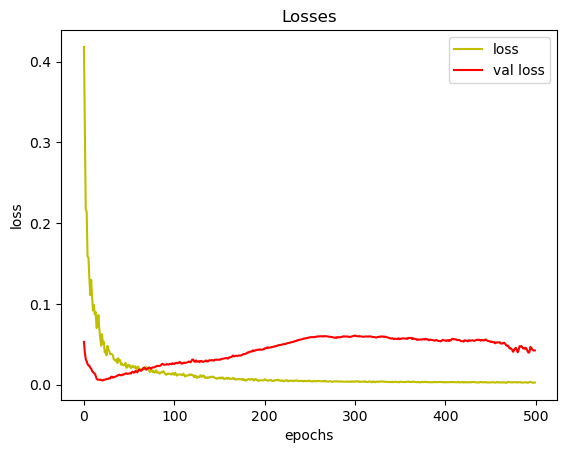

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']

x = np.arange(0, len(history.history['loss']))

plt.plot(x, loss, 'y', label='loss')
plt.plot(x, val_loss, 'r', label='val loss')
plt.title('Losses')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [16]:
y_pred = model.predict(X_test)

7/7 [==============================] - 0s 2ms/step


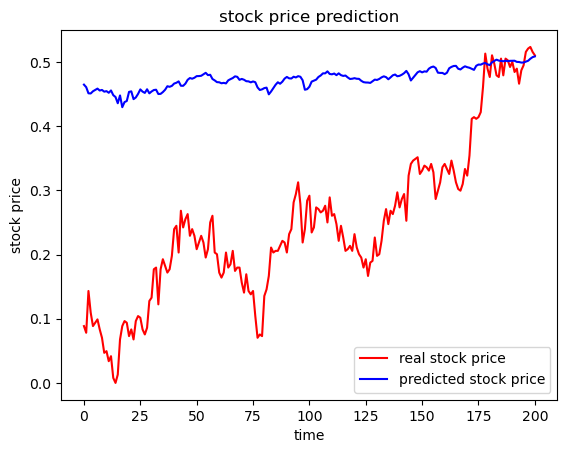

In [17]:
y_pred.shape

plt.plot(y_test, color='red', label='real stock price')
plt.plot(y_pred, color='blue', label='predicted stock price')
plt.title('stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()